In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [3]:
dtype = [('age', 'f8'), ('log_N','f8')]

N_Lyc_z0004 = np.genfromtxt("../data/response_NLyc_z0.004.txt", dtype=dtype, skip_header=9)
N_Lyc_z0008 = np.genfromtxt("../data/response_NLyc_z0.008.txt", dtype=dtype, skip_header=9)

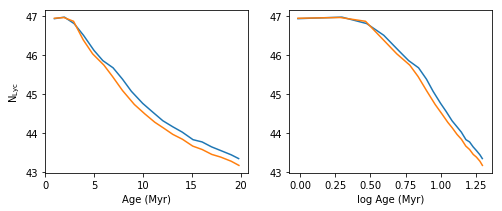

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(N_Lyc_z0004['age'], N_Lyc_z0004['log_N'])
ax[0].plot(N_Lyc_z0008['age'], N_Lyc_z0008['log_N'])
ax[0].set_xlabel('Age (Myr)')

ax[1].plot(np.log10(N_Lyc_z0004['age']), N_Lyc_z0004['log_N'])
ax[1].plot(np.log10(N_Lyc_z0008['age']), N_Lyc_z0008['log_N'])
ax[1].set_xlabel('log Age (Myr)')

ax[0].set_ylabel(r'N$_{\rm Lyc}$')

plt.show()

### Extrapolate the power law to larger ages

In [71]:
def get_power_law(x, y):
    log_x = np.log10(x)
    log_y = y

    N_points = len(x)
    
    m = (N_points * np.sum(log_x * log_y) - np.sum(log_x)*np.sum(log_y)) / (N_points * np.sum(log_x**2) - np.sum(log_x)**2)
    b = (np.sum(log_y) - m*np.sum(log_x))/N_points
    
    return m, b

In [73]:
def expand_arr(array):

    idx = np.where(array['age'] > 5.0)[0]
    m, b = get_power_law(array['age'][idx], array['log_N'][idx])

    print(m, b)

    add_x = 1.0e3
    add_y = np.log10(add_x)*m + b

    print(add_x, add_y)

    tmp_arr = np.ones(1, dtype=array.dtype)
    tmp_arr[0]['age'] = add_x
    tmp_arr[0]['log_N'] = add_y

    array = np.append(array, tmp_arr)
    
    return array

N_Lyc_z0004 = expand_arr(N_Lyc_z0004)
N_Lyc_z0008 = expand_arr(N_Lyc_z0008)

-4.875410588147821 49.64154822165186
1000.0 35.0153164572084
-4.931301179115226 49.514754820791694
1000.0 34.72085128344602


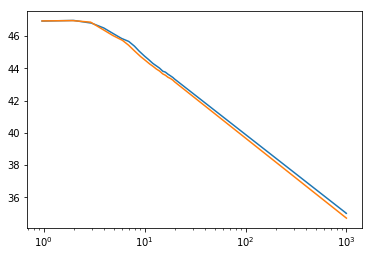

In [74]:
plt.plot(N_Lyc_z0004['age'], N_Lyc_z0004['log_N'])
plt.plot(N_Lyc_z0008['age'], N_Lyc_z0008['log_N'])

plt.xscale('log')

plt.show()

### Convert from number of ionizing photons to H_alpha luminosity

$$ L(H_{\alpha}) = 1.36 \times 10^{-12} N_{\rm Lyc}\ {\rm erg}\ {\rm s}^{-1} $$

Transformation from Section 3.1 from Oti-Floranes & Mas Hesse (2010)

In [91]:
get_log_L_Halpha_z0004 = interp1d(np.log10(N_Lyc_z0004['age']), np.log10(1.36e-12) + N_Lyc_z0004['log_N'], 
                                  bounds_error=False, fill_value=0.0)
get_log_L_Halpha_z0008 = interp1d(np.log10(N_Lyc_z0008['age']), np.log10(1.36e-12) + N_Lyc_z0008['log_N'], 
                                  bounds_error=False, fill_value=0.0)

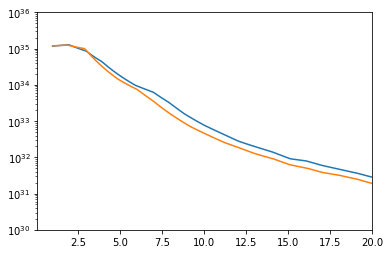

In [98]:
tmp_x = np.linspace(1.0, 1.0e3-1, 10000)

tmp_y = 10**get_log_L_Halpha_z0004(np.log10(tmp_x))
plt.plot(tmp_x, tmp_y)

tmp_y = 10**get_log_L_Halpha_z0008(np.log10(tmp_x))
plt.plot(tmp_x, tmp_y)

plt.xlim(0.1, 20)

# plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0e30, 1.0e36)
plt.show()